### Clustering

This jupyter notebook will:
- perform k means clustering
- perform Gaussian Mixture model


In [1]:
# importing libraries and modules needed for clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# import pca_data
pca_data = pd.read_pickle('pca_data.pkl')
pca_data_clustering = pca_data[['PLAYER', 'TEAM', 'POSITION', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]
x = pca_data_clustering.drop(['PLAYER', 'TEAM', 'POSITION'], axis=1)
x


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.882081,1.494421,-0.103091,-0.276908,-2.034680,0.646940,-0.847650
1,-3.105932,-3.972688,-0.099769,-0.275749,0.593826,-0.210098,-0.191335
2,0.288487,-4.568325,-1.555126,-1.268215,0.319178,0.871216,-0.080447
3,0.197796,-4.259287,-1.253244,-1.309263,-0.583111,-0.886630,0.408395
4,3.188852,0.733974,5.771234,-3.028903,7.864954,0.795206,2.981832
...,...,...,...,...,...,...,...
391,5.263395,0.616630,-0.827514,-1.665981,-0.742167,-0.320279,-1.455114
392,-0.849503,-6.196595,6.894639,-2.518939,0.948903,-1.509507,2.918007
393,0.115215,-4.537190,-1.805106,0.628896,-1.676585,0.339316,-0.824896
394,-6.056749,5.995335,-1.423611,0.042179,-1.203111,0.666256,2.164512


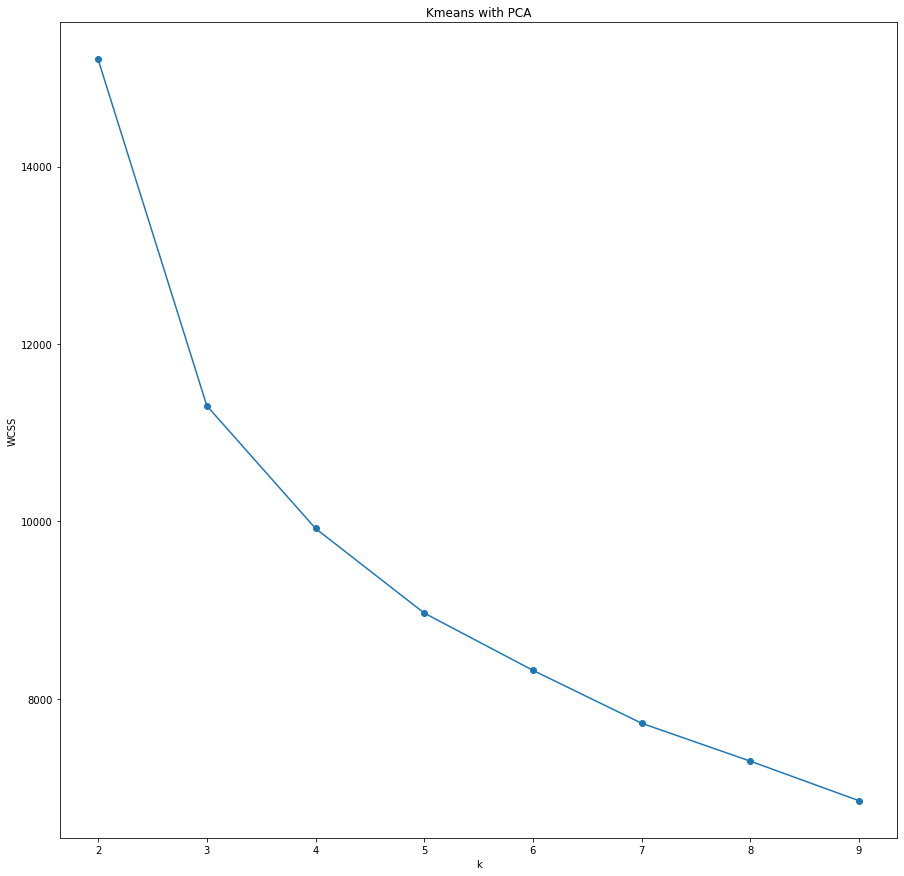

In [3]:
# applying elbow method to find the best number of K
# testing the algorithm with up to 10 clusters
wcss = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,15))
plt.plot(range(2,10), wcss, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA')
plt.show()

In [4]:
# fitting pca_data into k-means 
km = KMeans(n_clusters=3, init='k-means++')
km.fit(x)

KMeans(n_clusters=3)

In [5]:
model = pca_data_clustering.copy()
model['KM CLUSTER'] = km.labels_


/opt/miniconda3/envs/tf_python/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


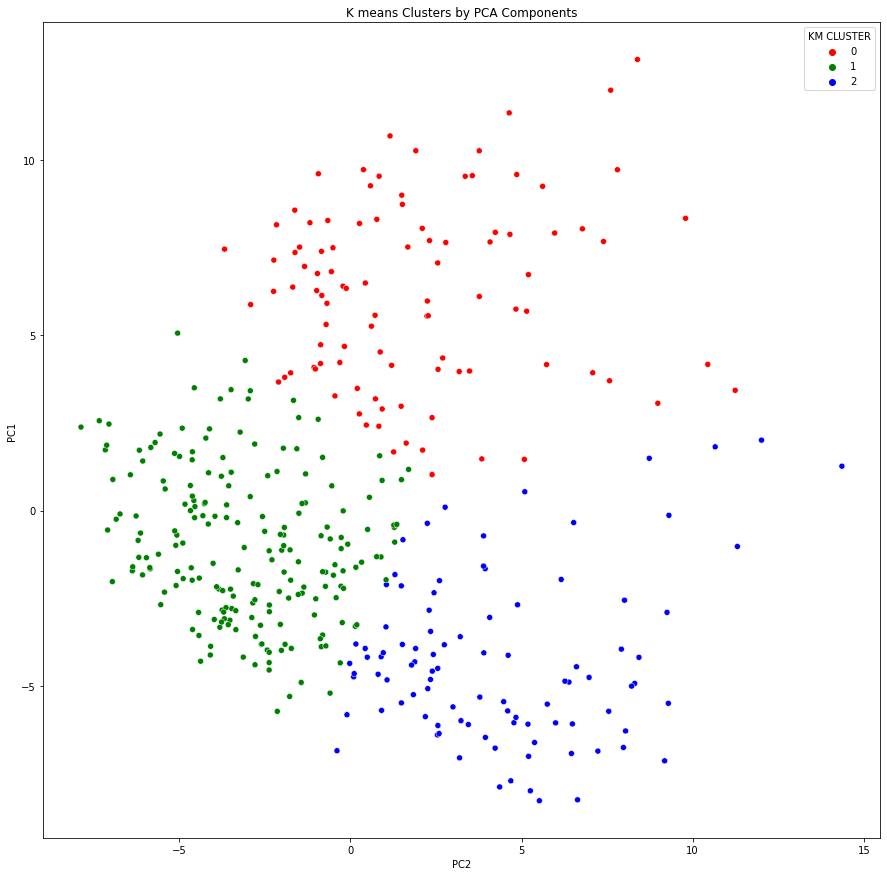

In [6]:
# plotting into 2D graph
plt.figure(figsize=(15,15))
sns.scatterplot(model['PC2'], model['PC1'], hue=model['KM CLUSTER'], palette=['r', 'g', 'b'])
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title('K means Clusters by PCA Components')
plt.show()

Text(0.5, 1.0, 'BIC and AIC scores / no. of clusters')

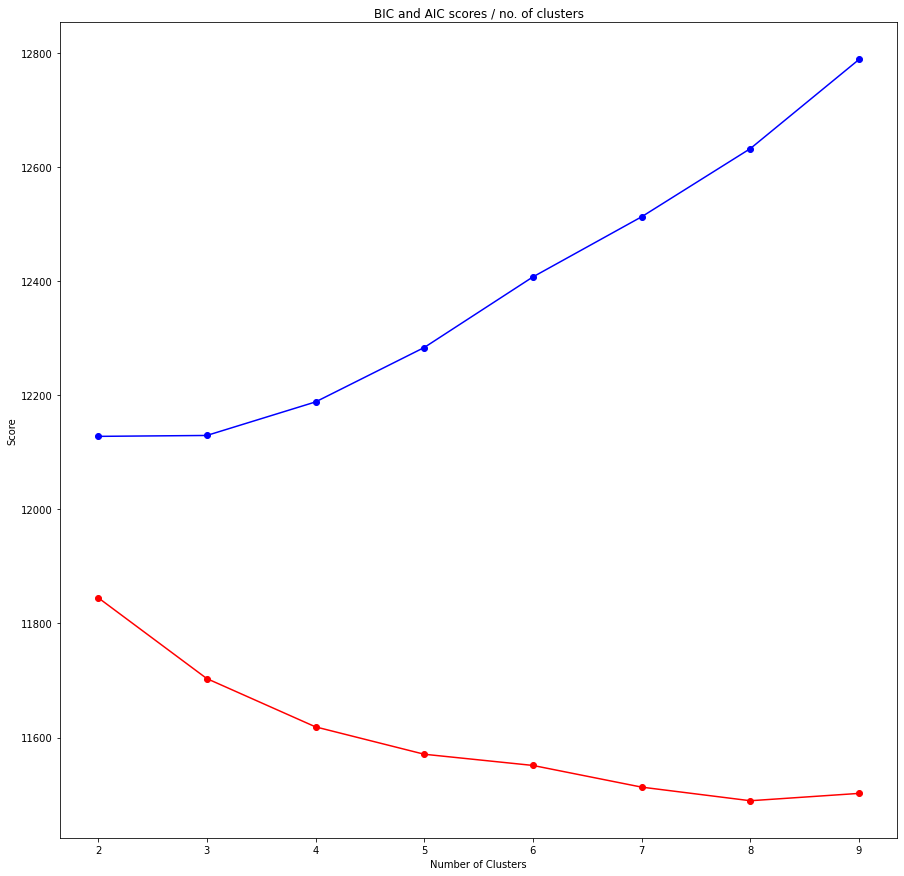

In [7]:
# applying BIC and AIC scores to find the best number of clusters for GMM
n_range = range(2, 10)
bic_scores = []
aic_scores = []
for n in n_range:
    gm = GaussianMixture(n_components=n, n_init=10)
    gm.fit(x)
    bic_scores.append(gm.bic(x))
    aic_scores.append(gm.aic(x))

fig, ax = plt.subplots(figsize=(15,15), nrows=1)
ax.plot(n_range, bic_scores, '-o', color='blue')
ax.plot(n_range, aic_scores, '-o', color='red')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC scores / no. of clusters')


In [8]:
# fitting pca_data into GMM
gm = GaussianMixture(n_components=8, n_init=10)
gm_labels = gm.fit_predict(x)
model['GMM CLUSTER'] = gm_labels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


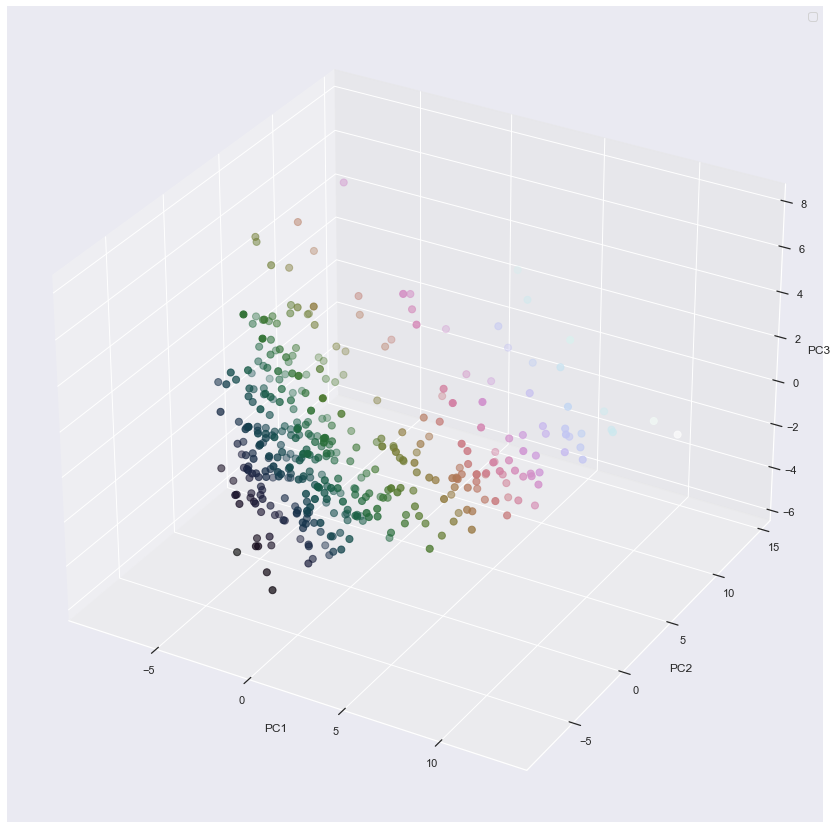

In [9]:
# plotting into 3D graph
sns.set(style='darkgrid')
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
x = model['PC1']
y = model['PC2']
z = model['PC3']
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
threed_cmap = plt.get_cmap('cubehelix')
ax.scatter(x, y, z, c=(x + y + z), cmap=threed_cmap, s=50)
ax.legend()
plt.show()

In [10]:
# Clustering with PCA
model.to_pickle('model.pkl')
model

,PLAYER,TEAM,POSITION,PC1,PC2,PC3,PC4,PC5,PC6,PC7,KM CLUSTER,GMM CLUSTER
0,Aaron Gordon,DEN,F,0.882081,1.494421,-0.103091,-0.276908,-2.034680,0.646940,-0.847650,1,2
1,Aaron Holiday,IND,G,-3.105932,-3.972688,-0.099769,-0.275749,0.593826,-0.210098,-0.191335,1,4
2,Aaron Nesmith,BOS,G-F,0.288487,-4.568325,-1.555126,-1.268215,0.319178,0.871216,-0.080447,1,5
3,Abdel Nader,PHX,F,0.197796,-4.259287,-1.253244,-1.309263,-0.583111,-0.886630,0.408395,1,5
4,Al Horford,BOS,C-F,3.188852,0.733974,5.771234,-3.028903,7.864954,0.795206,2.981832,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
391,Xavier Tillman,MEM,F,5.263395,0.616630,-0.827514,-1.665981,-0.742167,-0.320279,-1.455114,0,1
392,Yogi Ferrell,LAC,G,-0.849503,-6.196595,6.894639,-2.518939,0.948903,-1.509507,2.918007,1,0
393,Yuta Watanabe,TOR,G-F,0.115215,-4.537190,-1.805106,0.628896,-1.676585,0.339316,-0.824896,1,4
394,Zach LaVine,CHI,G-F,-6.056749,5.995335,-1.423611,0.042179,-1.203111,0.666256,2.164512,2,3
